<a href="https://colab.research.google.com/github/estebanhernandezr/DNA-compression/blob/main/Entropy_revisited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from typing import BinaryIO, Dict, Sequence, Tuple
import numpy as np
from math import log
import matplotlib.pyplot as plt
import string
import random

#Entropy

##Hyper-parameters

In [8]:
base = 2
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',' k', 'l', 'm',
            'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'y', 'z']

##Entropy by *Ralph Hartley* (1928)
A quantitative measure of information was presented in *Bell System Technical
Journal* already 1928 by *Ralph Hartley*: *the information content*, $I_H$, in a
message consisting of $n$ characters, each of them chosen from an alphabet
of $N$ different symbols, should be proportional to the length $n$ multiplied
by some function of the size of the alphabet, $f(N)$, so that $I_H = nf(N)$.

The functional form of *the information content* is supported by the argument that if the message is coded using an alphabet of different size $N_0$ resulting in another length $n_0$, then *the information content* should not change: $I_H = n_0f(N_0)$. The function $f$ that preserves the *information content* is $log_K$, where $K$ is an arbitrary base of the logarithm: different $K$ just results in a scaling of *the information content*.

Therefore, *Ralph Hartley* formulated *the information content* as
$$I_H(n,N)=n\,log_{K}(N),$$
where $n$ is the length of the message and $N$ is the cardinality of the alphabet.


In [3]:
def Message_Hartley_Entropy(message: str, alpha: int) -> float:
    entropy_per_message: float = len(message)*log(alpha, base)
    return entropy_per_message

def Symbol_Hartley_Entropy(message: str, alpha: int) -> float:
    entropy_per_message: float = len(message)*log(alpha, base)
    entropy_per_symbol: float = entropy_per_message/len(message)
    return entropy_per_symbol

*Hartley*'s approach, nonetheless, builds upon the worst case escenario: all symbols are equally likely to appear next in the sequence, as we may witness with the *Shannon's information content (generalized) formulation*, in the next subsection.

As a matter of fact, the *Hartley's information content* does not depend on the sequence itself, but only on its lenght and the length of the alphabet it was written with: really, not even on the symbols themselves. Indeed, we could have omitted passing the message string to the *Message_Hartley_Entropy* and *Symbol_Hartley_Entropy* functions, as a parameter: and we may later.

The previous is illustrated below.

**FACT**: Whenever we generate a random sequence of characters, taken from any alphabet, we will always get the same value for the *Hartley's information content* measure, as long as the length of the sequence stays the same as well as the length of the alphabet.

Try it yourself...

In [4]:
n = 100
print('length of the message:', n)
print('size of the alphabet:', len(string.ascii_letters), end='\n\n')

cad = ''.join(random.choice(string.ascii_letters) for _ in range(n))
print('random message:', cad, end='\n\n')
print('message entropy:', Message_Hartley_Entropy(cad, len(alphabet)))
print('symbol entropy:', Symbol_Hartley_Entropy(cad, len(alphabet)))

length of the message: 100
size of the alphabet: 52

random message: InqXVjofdqtAWyCxECrCqDeIXGqCvGvfWnLKPnImuSuDQUOnbSQoVrDTpqPVNOEYpDNuKokaavxduBNHRYQYAjQneVEhKRznROQI

message entropy: 134.23754829424792
symbol entropy: 1.3423754829424792


As a matter of fact, here is some subtle detail that is worth noting: different values for the base $K$ results just in a scaling of the *Hartley's information content*. We show this by interpretating $K$ in terms of combinatory.

What we got is a scaling of a logaritmic function for the *Hartley's information content* in the message: the scaling factor is the length of the message; the logaritmic function, the *Hartley's information content* per symbol, depends not only on the size of the alphabet, but also on the base $K$. Indeed, we would like to generate $N$ different symbols with an alphabet of $K$ symbols (encode). For that end, note that
$$N=K^{log_{K}(N)}.$$
In this context, the quantity $log_{K}(N)$ is interpreted as the exact number of *placeholders* needed to form $N$ different combinations with $K$ symbols.  

By the *pigeonhole principle*, if $K<N$, then at least one of the $N$ symbols must be encoded with two or more of the $K$ symbols *i.e* the number of *placeholders*, $log_{K}(N)$, must be grater or equal than $2$, in order to asign each symbol a unique code. For fixed $K$, $log_{K}(N)$ is an increasing function of $N$. However, for $N'>N$, one can match combinations of two or more symbols from the smaller alphabet to the remaining unmatched $N'-N$ symbols in the larger alphabet. Therefore, the number of *placeholders*, $log_{K}(N)$, increase, but at the same time, the message itself can be written in the new alphabet with less symbols: since combinations of symbols in the smaller alphabet can be written as only one symbol from the larger alphabet. So, there will be more *placeholders* per symbol, but less symbols, in the code.

The most straightforward way to illustrate this is with the powers of a given alphabet size $N$: $N^{2}$, $N^{3}$, ..., $N^{p}$. For the sizes of alphabet therein you can interpolate safely, as long as $log_{K}(⋅)$ is an monotically increasing function of its argument. In this case, all $N$ symbols of the smaller alphabet are asigned to the "first" $N$ symbols of the larger alphabet. Then, the remaining $N^{p-1}$ symbols in the larger alphabet can be matched with all the $p$-length combinations of symbols from the smaller alphabet. This reduces the length of the message from $n$ symbols to $\frac{n}{p-1}$.

(Now that we have understood the physical meaning behind the parameters of the entropy functions, we can start working with the mathematical definition itself, while keeping that in mind. For this end, we redefine the *information content* functions above into a more general formulation, where the parameters of the functions are not restricted to their physical meaning.)

In [35]:
def Message_Hartley_Entropy_generalized(n: float, alpha: int) -> float:
    entropy_per_message: float = n*log(alpha, base)
    return entropy_per_message

def Symbol_Hartley_Entropy_generalized(n: float, alpha: int) -> float:
    entropy_per_message: float = n*log(alpha, base)
    entropy_per_symbol: float = entropy_per_message/n
    return entropy_per_symbol

Try it yourself...

In [38]:
Message_Hartley_Entropies = []
Symbol_Hartley_Entropies = []
Sizes_of_alphabet = []

n = 60

powers = 30
for size in range(1, powers, 1):
    #Message_Hartley_Entropies.append((n/size)*log(n**size, base))
    Message_Hartley_Entropies.append(Message_Hartley_Entropy_generalized(n/size, n**size))
    Symbol_Hartley_Entropies.append(Symbol_Hartley_Entropy_generalized(n/size, n**size))
    Sizes_of_alphabet.append(n/size)

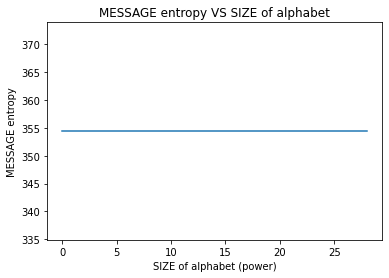

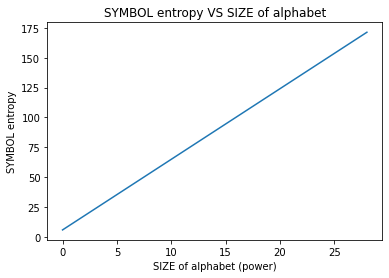

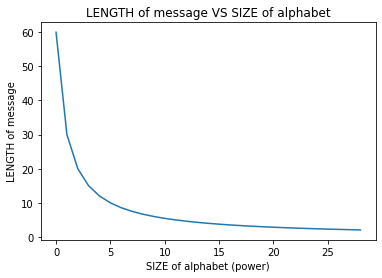

In [39]:
plt.title('MESSAGE entropy VS SIZE of alphabet')
plt.xlabel('SIZE of alphabet (power)')
plt.ylabel('MESSAGE entropy')
plt.plot(Message_Hartley_Entropies)
plt.show()
plt.title('SYMBOL entropy VS SIZE of alphabet')
plt.xlabel('SIZE of alphabet (power)')
plt.ylabel('SYMBOL entropy')
plt.plot(Symbol_Hartley_Entropies)
plt.show()
plt.title('LENGTH of message VS SIZE of alphabet')
plt.xlabel('SIZE of alphabet (power)')
plt.ylabel('LENGTH of message')
plt.plot(Sizes_of_alphabet)
plt.show()

As expected, what we can see here is that, $log_{K}(N)$, interpreted as the number of *placeholders* increases with, $N$, interpreted as the power of the alphabet size: more symbols to enconde require more *placeholders* in the code. While, the length of the message decreases with $N$. This is the reason why they all have the same entropy per message, even when they have a different entropy per symbol. Indeed, the number of *placeholders* and the entropy per symbol balance themselves: when one increases, the other decreases, to mantain the same entropy per message throughout changes on the size of the alphabet.

You can try chaging the *base* hyperparameter defined at the top cell and see that the shape of the curves does not change, but only the scale of the *y-axis*.

##Entropy by *Claude Shannon* (1948)